# 0. Import Dependencies and Pretrained Model

In [1]:
import cv2
import ipywidgets as widgets
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import display
from matplotlib import pyplot as plt


In [2]:
import matplotlib
!python3 --version  # 3.7.12
print(cv2.__version__)  # 4.1.2
print(widgets.__version__) # 7.6.5
print(np.__version__)  # 1.19.5
print(tf.__version__)  # 2.7.0
print(hub.__version__)  # 0.12.0
print(matplotlib.__version__)  # 3.2.2

Python 3.7.12
4.1.2
7.6.5
1.21.5
2.8.0
0.12.0
3.2.2


In [3]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [4]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [5]:
#@title Mount drive
from google.colab import drive
drive.mount('1. Preprocess Image and Load')

Mounted at /content/gdrive/


In [6]:
content_folder = '/content/gdrive/MyDrive/style_transfer' #@param ['/content/gdrive/MyDrive/style_transfer'] {allow-input: true}
content_image_name = "kona.jpg" #@param ["ben_meditation.jpg", "peter_meditation.jpg"] {allow-input: true}
style_folder = '/content/gdrive/MyDrive/style_transfer/' #@param ['/content/gdrive/MyDrive/style_transfer/'] {allow-input: true}
style_image_name = "Orb.jpg" #@param ["waves.jpg", "ink.jpg"] {allow-input: true}

try:
  content_image = load_image(content_folder + '/' + content_image_name)
except:
  print("There was a problem with the content image file you selected. Please choose a BMP, GIF, JPEG, or PNG image file and try again.")
try:
  style_image = load_image(style_folder + '/' + style_image_name)
except:
  print("There was a problem with the style image file you selected. Please choose a BMP, GIF, JPEG, or PNG image file and try again.")


# 2. Visualize Output

In [7]:
content_image.shape

TensorShape([1, 1600, 1200, 3])

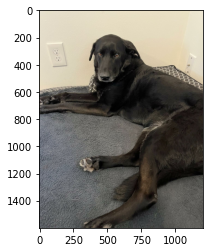

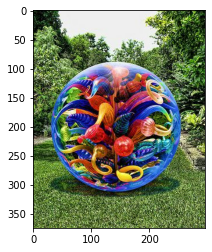

In [8]:
plt.imshow(np.squeeze(content_image))
plt.show()
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

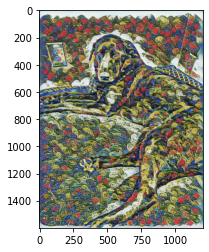

In [9]:
#@title Create and preview styleized image
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [11]:
#@title Save styleized image
button = widgets.Button(description="Save file")
output = widgets.Output()

def on_button_clicked(b):
  try:
    saved = cv2.imwrite(('/content/gdrive/MyDrive/style_transfer/' + save_name), cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))
  except:
    saved = False
  with output:
    if saved:
      print('File saved at /content/gdrive/MyDrive/style_transfer/' + save_name)
    else:
      print("Something went wrong. Please check the folder and file name then try again.")
      
save_name = "orb_kona.jpg" #@param ["styled_image.jpg"] {allow-input: true}
button.on_click(on_button_clicked)
display(button, output)



Button(description='Save file', style=ButtonStyle())

Output()